# Mean+Gaussian Threshold 
A thresholding function returns an intensity value that can be used to separate foreground and background based on calculations done on the intensity bins.

 Mean thresholding derives the threshold value from the average intensity value of the kernel or image it is thresholding. 
 
Gaussian thresholding is used exclusively for adaptive or local thresholding. This methodology of thresholding uses a kernel system similar to Sobel - it will threshold the image in chunks to find an appropriate threshold for each region of the image. When thresholding a section of an image, gaussian finds the weighted sum of the kernel values to calculate a threshold.

### Functions

#### Syntax:skimage.filters.threshold_local(image, block_size, method, offset, mode, param, cval)
#### Parameters:
image: (N, M[, …, P]) ndarray

    -Grayscale input image.

block_size: int or sequence of int

    -Odd size of pixel neighborhood which is used to calculate the threshold value (e.g. 3, 5, 7, …, 21, …).

method: {‘generic’, ‘gaussian’, ‘mean’, ‘median’}, optional

    -Method used to determine adaptive threshold for local neighborhood in weighted mean image.

    ‘generic’: use custom function (see param parameter)

    ‘gaussian’: apply gaussian filter (see param parameter for custom sigma value)

    ‘mean’: apply arithmetic mean filter

    ‘median’: apply median rank filter

    By default the ‘gaussian’ method is used.

offset: float, optional

    -Constant subtracted from weighted mean of neighborhood to calculate the local threshold value. Default offset is 0.

mode: {‘reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’}, optional

    -The mode parameter determines how the array borders are handled, where cval is the value when mode is equal to ‘constant’. Default is ‘reflect’.

param: {int, function}, optional

    -Either specify sigma for ‘gaussian’ method or function object for ‘generic’ method. This functions takes the flat array of local neighborhood as a single argument and returns the calculated threshold for the centre pixel.

cval: float, optional

    -Value to fill past edges of input if mode is ‘constant’.



It is important to highlight the fact that there are various other types of thresholding algorithms with different approaches and characteristics.



In [6]:
import cv2
import skimage
import skimage.io as io
import skimage.filters as filters
import skimage.color as color
from skimage.filters import try_all_threshold
import numpy as np
import matplotlib.pyplot as plt
import rasterio

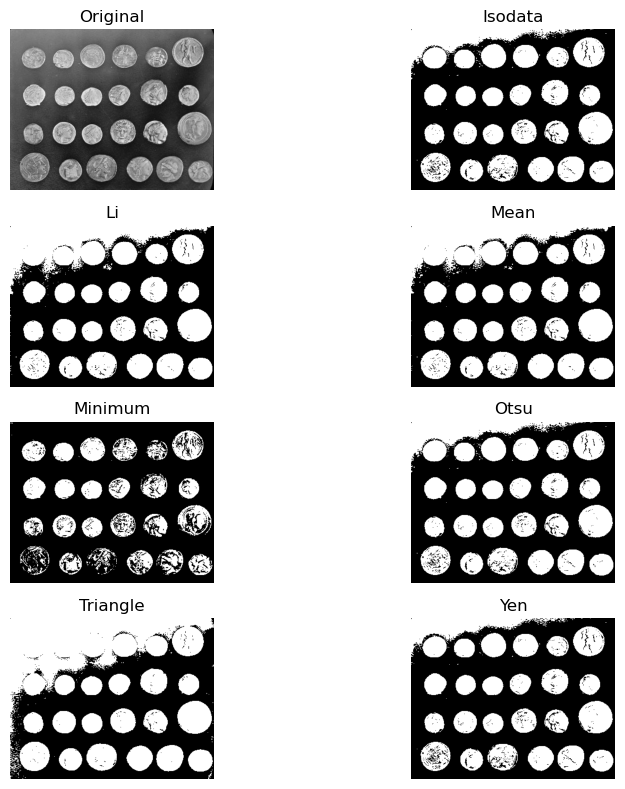

In [7]:
img = skimage.data.coins()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
io.show()


The difference between global mean thresholding and local gaussian thresholding can be highlighted in the following example.


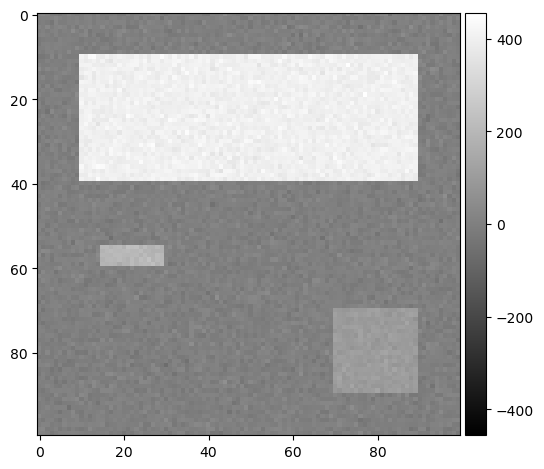

In [8]:

# Example image
image = np.zeros((100, 100))

# Squares with differing values
image[10:40, 10:90] = 400
image[55:60, 15:30] = 200
image[70:90, 70:90] = 100

# Add random noise
noise = np.random.normal(0, 15, size=(100, 100))
image += noise  # adds noise to image

io.imshow(image, cmap='gray')
io.show()

This numpy array clearly has a foreground of three squares with a noisy background.


C:\Users\chloe\anaconda3\envs\sia\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


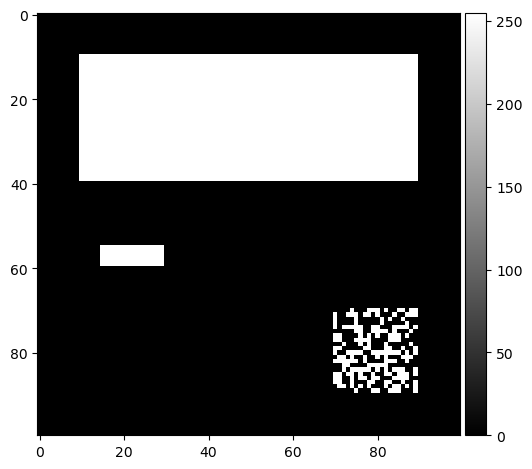

In [9]:
# Mean thresholding
mean_threshold = np.mean(image)  # Average of image array
mean_thresholded = np.where(image > mean_threshold, 255, 0)  # Sets values of "image" that are greater than threshold to 255, if not, 0

io.imshow(mean_thresholded, cmap='gray')
io.show()

In [10]:
mean_threshold

101.46918825688826

Since our image has a contrasting foreground and background, it was easy for the mean threshold to preserve 2 out of the 3 blocks in the array. However, since one was dim in comparison to the rest, one square was excluded in the threshold. 

The following example is thresholded with a local gaussian model.

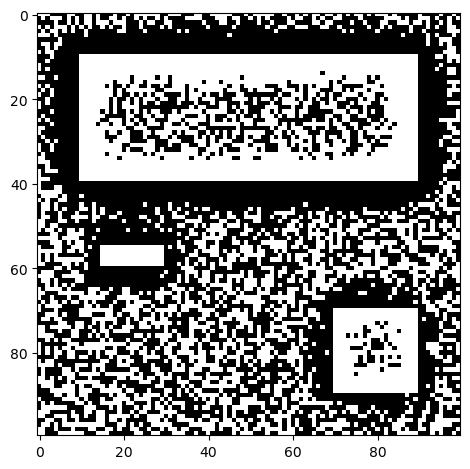

In [11]:
block_size = 21  # Size of the kernel
gaussian_threshold = filters.threshold_local(image, block_size, method='gaussian', mode='reflect')

# Apply thresholding
binary_image = image > gaussian_threshold
normalized_binary = binary_image.astype(float)  # Converts Bool to float
normalized_binary /= normalized_binary.max()  # Normalized

io.imshow(normalized_binary, cmap='gray')
io.show()

 The local gaussian threshold was able to find appropriate threshold values for all three of the squares, compensating for their level of intensity which highlighted the edges. Additionally, when kernels were entirely background, you can see that there was difficulty as the model could not find edges. That is why it is common to subtract a constant from the threshold to account for kernels with just background.




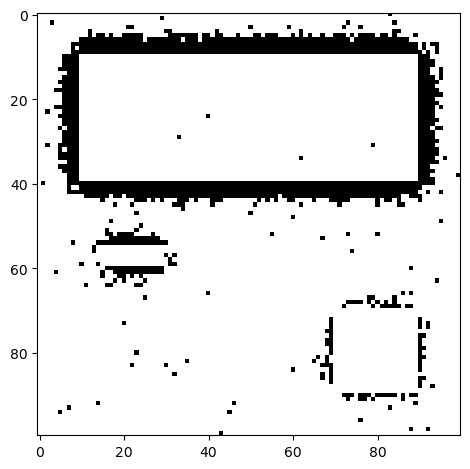

In [12]:
from skimage import io

constant = 36  # Change as needed
gaussian_threshold -= constant  # Subtracting a constant

binary_image = image > gaussian_threshold

normalized_binary = binary_image.astype(float)  # Converts Bool to float
normalized_binary /= normalized_binary.max()  # Normalized

io.imshow(normalized_binary, cmap='gray')
io.show()

# Reference list 
[1]	“Auto Threshold,” ImageJ Wiki. https://imagej.github.io/plugins/auto-threshold (accessed Jun. 27, 2023).

[2] “scikit-image’s documentation — skimage 0.21.0 documentation.” https://scikit-image.org/docs/stable/ (accessed Jul. 06, 2023).

[3]	“Gaussian Blur.” https://www.w3.org/Talks/2012/0125-HTML-Tehran/Gaussian.xhtml (accessed Jun. 28, 2023).

[4]	“NumPy.” https://numpy.org/ (accessed Jun. 29, 2023).

[5]	“OpenCV: Image Thresholding.” https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html (accessed Jun. 29, 2023).

